In [1]:
import numpy as np
import torch 
from collections import OrderedDict
import os
import copy

from utils.sample_parameters import ParamSamples
from utils.train_n_test import TrainTest
from utils.custom_loss import revenue_loss

from models.CNN_1D_vanilla import CNN_1D

In [2]:
params_dict = {
    # HYPERMARAMETER RANGES
    'BATCH_SIZE': ([64, 128, 256, 512], None),
    'EPOCHS': ([20, 40, 50], None),
    'OPTIMIZER': ([torch.optim.RMSprop, torch.optim.Adam], None),
    'LEARNING_RATE': ([1e-5, 5e-5, 1e-4, 5e-4, 1e-3], None),
    'LOSS': ([revenue_loss()], None),
    'EARLY_STOPPING': ([True], None),
    'PATIENCE': (list(range(0,3)), None),
    'MIN_DELTA': ([1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4], None), 

    # NETWORK PARAMETER RANGES
    'HIDDEN_DEPTH': (np.arange(2, 5), None),
    'HIDDEN_SIZES': ([64, 128, 256, 512], 
                       {'max_depth': 'HIDDEN_DEPTH', # sample a list of maximum HIDDEN_DEPTH length 
                        'consecutive': 1}), # list must be increasing 
    'KERNEL_SIZES': ([3,5,7,9], 
                        {'max_depth': 'HIDDEN_DEPTH', 
                        'monotonic': -1}),  
    'MAXPOOL': ([2], None),
    'FC_DEPTH':  (np.arange(1,3), None),
    'FC_SIZES': ([256, 512], 
                    {'max_depth': 'FC_DEPTH',
                    'consecutive': -1}),
    'DROPOUT': (np.arange(8)/10, None)
}

In [34]:
fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': torch.nn.MSELoss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 1,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2}]

In [4]:
N = 3
FIX = True

CSV_NAMES = [i for i in os.listdir('data/tensors') if 'expt' in i ]
CSV_NAMES = [i for i in CSV_NAMES if 'expt0' not in i ]
CSV_NAMES = [i for i in CSV_NAMES if 'persistence' not in i ]

#PKL_NAMES = [i for i in os.listdir('data/tensors') if 'expt0' in i ]
#PKL_NAMES = [i for i in PKL_NAMES if 'persistence' not in i ]

In [5]:
#CSV_NAMES = ['expt0_mean_speeds_mean_dirs_1dtime_original_interpolation.pkl']

In [6]:
for pkl in CSV_NAMES: # PKL_NAMES 
    PKL_NAME = pkl[:-4]
    print(PKL_NAME)
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')
    
    torch.nn.MSELoss()(persistence, test[1])
    
    if FIX: 
        param_samples = [copy.deepcopy(fixed_params[0]) for _ in range(N)]        
    else: 
        params = ParamSamples(OrderedDict(params_dict))
        param_samples = params.SampleAll(N)

    stats = []
    for i in np.arange(N): 
        print(param_samples[i])
        run = TrainTest(CNN_1D, (train, val, test), param_samples[i], class_size=1)
        run.train()
        run.test()
        stats.append(run.stats)
    
        for i in np.arange(N):
            for key,val in stats[i].items():
                param_samples[i][key] = val

        torch.save(param_samples, 'results/CNN1D_experiment_N'+str(N)+'_'+PKL_NAME+'.pkl')

expt10


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.019328530877828598, valid_loss: 0.04093233868479729


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009700950235128403, valid_loss: 0.02963401935994625


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008255809545516968, valid_loss: 0.029203960672020912


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007432269863784313, valid_loss: 0.025067610666155815


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006608509924262762, valid_loss: 0.02463442087173462


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006128729786723852, valid_loss: 0.02234731987118721


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.00573382992297411, valid_loss: 0.0242267195135355


100%|██████████| 12/12 [00:01<00:00,  7.13it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 290.2586040496826
test_loss: tensor(0.0211)
revenue: 48.83351160058197
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01826798915863037, valid_loss: 0.03831079974770546


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009817570447921753, valid_loss: 0.03465329855680466


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008412390016019344, valid_loss: 0.02944082021713257


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.0072957598604261875, valid_loss: 0.02724328078329563


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006576030049473047, valid_loss: 0.026769330725073814


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006008279975503683, valid_loss: 0.024984780699014664


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005498200189322233, valid_loss: 0.025180179625749588


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.005112620070576668, valid_loss: 0.02349488064646721


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 8, train_loss: 0.004679759964346886, valid_loss: 0.025456110015511513


100%|██████████| 12/12 [00:01<00:00, 10.37it/s]


Early stopped at Epoch:  9


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 310.5591232776642
test_loss: tensor(0.0181)
revenue: 49.88476954205439
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018679829314351082, valid_loss: 0.03749066963791847


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009195390157401562, valid_loss: 0.03307227045297623


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.007968219928443432, valid_loss: 0.0276847705245018


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006971899885684252, valid_loss: 0.02456606924533844


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.00625183992087841, valid_loss: 0.02497611939907074


100%|██████████| 12/12 [00:01<00:00,  9.85it/s]


Early stopped at Epoch:  5
train_time: 185.33167552947998
test_loss: tensor(0.0225)
revenue: 48.41222430854245
expt11


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 5, 'train_time': 185.33167552947998, 'test_loss': tensor(0.0225), 'mean_train_loss': [0.018679833, 0.00919539, 0.007968221, 0.0069718994, 0.0062518395, 0.005729035], 'mean_val_loss': [0.03749067, 0.033072267, 0.027684772, 0.024566067, 0.024976121], 'min_val_loss': 0.024566067, 'predictions': tensor([-0.0451,  0.0128,  0.0196,  ..., -0.1023, -0.0725,  0.0274]), 'bal_list': array([1.00000000e+07, 1.01057386e+07, 1.02268891e+07, ...,
       4.83804288e+08, 4.83980279e+08, 4.84122243e+08]), 'revenue': 484122243.0854245}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018795059993863106, valid_loss: 0.04260750114917755


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009987669996917248, valid_loss: 0.029198359698057175


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008460739627480507, valid_loss: 0.027823690325021744


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007475030142813921, valid_loss: 0.022358529269695282


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006745679769665003, valid_loss: 0.02332345023751259


100%|██████████| 12/12 [00:01<00:00, 10.03it/s]


Early stopped at Epoch:  5


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 187.68454599380493
test_loss: tensor(0.0194)
revenue: 48.049802552596695
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 5, 'train_time': 185.33167552947998, 'test_loss': tensor(0.0225), 'mean_train_loss': [0.018679833, 0.00919539, 0.007968221, 0.0069718994, 0.0062518395, 0.005729035], 'mean_val_loss': [0.03749067, 0.033072267, 0.027684772, 0.024566067, 0.024976121], 'min_val_loss': 0.024566067, 'predictions': tensor([-0.0451,  0.0128,  0.0196,  ..., -0.1023, -0.0725,  0.0274]), 'bal_list': array([1.00000000e+07, 1.01057386e+07, 1.02268891e+07, ...,
       4.83804288e+08, 4.83980279e+08, 4.84122243e+08]), 'revenue': 484122243.0854245}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.0180507805198431, valid_loss: 0.037245869636535645


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009422769770026207, valid_loss: 0.02747924067080021


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.007986649870872498, valid_loss: 0.026717809960246086


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007037539966404438, valid_loss: 0.027669589966535568


100%|██████████| 12/12 [00:01<00:00, 11.62it/s]


Early stopped at Epoch:  4


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 157.6870152950287
test_loss: tensor(0.0232)
revenue: 44.634453647166524
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 5, 'train_time': 185.33167552947998, 'test_loss': tensor(0.0225), 'mean_train_loss': [0.018679833, 0.00919539, 0.007968221, 0.0069718994, 0.0062518395, 0.005729035], 'mean_val_loss': [0.03749067, 0.033072267, 0.027684772, 0.024566067, 0.024976121], 'min_val_loss': 0.024566067, 'predictions': tensor([-0.0451,  0.0128,  0.0196,  ..., -0.1023, -0.0725,  0.0274]), 'bal_list': array([1.00000000e+07, 1.01057386e+07, 1.02268891e+07, ...,
       4.83804288e+08, 4.83980279e+08, 4.84122243e+08]), 'revenue': 484122243.0854245}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01874464936554432, valid_loss: 0.03808720037341118


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009698529727756977, valid_loss: 0.029262520372867584


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008321579545736313, valid_loss: 0.02580964006483555


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.0073040202260017395, valid_loss: 0.025540219619870186


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006646070163697004, valid_loss: 0.027634020894765854


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006077180150896311, valid_loss: 0.02347813919186592


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005784240085631609, valid_loss: 0.023854980245232582


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.005312869790941477, valid_loss: 0.021702580153942108


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 8, train_loss: 0.004886940121650696, valid_loss: 0.022120919078588486


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 9, train_loss: 0.004590549971908331, valid_loss: 0.020813530310988426


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 10, train_loss: 0.004396229982376099, valid_loss: 0.022428929805755615


100%|██████████| 12/12 [00:01<00:00, 10.87it/s]


Early stopped at Epoch:  11
train_time: 388.4097511768341
test_loss: tensor(0.0187)
revenue: 50.22606710639504
expt12


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 11, 'train_time': 388.4097511768341, 'test_loss': tensor(0.0187), 'mean_train_loss': [0.018744653, 0.0096985325, 0.008321577, 0.0073040216, 0.006646069, 0.006077184, 0.0057842415, 0.0053128675, 0.0048869387, 0.0045905462, 0.0043962314, 0.0040087835], 'mean_val_loss': [0.0380872, 0.029262526, 0.02580964, 0.02554022, 0.027634017, 0.023478141, 0.02385498, 0.021702582, 0.022120923, 0.020813532, 0.022428928], 'min_val_loss': 0.020813532, 'predictions': tensor([ 0.0147,  0.0806,  0.1366,  ..., -0.0697, -0.0019,  0.0729]), 'bal_list': array([1.00000000e+07, 1.01577602e+07, 1.03378740e+07, ...,
       5.01852977e+08, 5.020

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018717069178819656, valid_loss: 0.04304537922143936


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00948088988661766, valid_loss: 0.028446689248085022


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.00788090005517006, valid_loss: 0.02510426938533783


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.0069107902236282825, valid_loss: 0.028738470748066902


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006232250016182661, valid_loss: 0.024828599765896797


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.00591519009321928, valid_loss: 0.023220840841531754


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005208970047533512, valid_loss: 0.023816389963030815


100%|██████████| 12/12 [00:01<00:00, 11.78it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 243.69562363624573
test_loss: tensor(0.0181)
revenue: 50.152533615566334
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 11, 'train_time': 388.4097511768341, 'test_loss': tensor(0.0187), 'mean_train_loss': [0.018744653, 0.0096985325, 0.008321577, 0.0073040216, 0.006646069, 0.006077184, 0.0057842415, 0.0053128675, 0.0048869387, 0.0045905462, 0.0043962314, 0.0040087835], 'mean_val_loss': [0.0380872, 0.029262526, 0.02580964, 0.02554022, 0.027634017, 0.023478141, 0.02385498, 0.021702582, 0.022120923, 0.020813532, 0.022428928], 'min_val_loss': 0.020813532, 'predictions': tensor([ 0.0147,  0.0806,  0.1366,  ..., -0.0697, -0.0019,  0.0729]), 'bal_list': arr

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.016587650403380394, valid_loss: 0.036937400698661804


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00876316986978054, valid_loss: 0.031852979212999344


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.0073243300430476665, valid_loss: 0.025936370715498924


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.006502309814095497, valid_loss: 0.03055921010673046


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.005918699782341719, valid_loss: 0.02160191908478737


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.005348979961127043, valid_loss: 0.02589040994644165


100%|██████████| 12/12 [00:01<00:00,  9.32it/s]


Early stopped at Epoch:  6


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 225.26785230636597
test_loss: tensor(0.0171)
revenue: 50.91963199613709
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 11, 'train_time': 388.4097511768341, 'test_loss': tensor(0.0187), 'mean_train_loss': [0.018744653, 0.0096985325, 0.008321577, 0.0073040216, 0.006646069, 0.006077184, 0.0057842415, 0.0053128675, 0.0048869387, 0.0045905462, 0.0043962314, 0.0040087835], 'mean_val_loss': [0.0380872, 0.029262526, 0.02580964, 0.02554022, 0.027634017, 0.023478141, 0.02385498, 0.021702582, 0.022120923, 0.020813532, 0.022428928], 'min_val_loss': 0.020813532, 'predictions': tensor([ 0.0147,  0.0806,  0.1366,  ..., -0.0697, -0.0019,  0.0729]), 'bal_list': arra

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017790550366044044, valid_loss: 0.03455169126391411


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.008978069759905338, valid_loss: 0.027956120669841766


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.007601679768413305, valid_loss: 0.02232109010219574


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.006789979990571737, valid_loss: 0.026411380618810654


100%|██████████| 12/12 [00:01<00:00, 11.23it/s]


Early stopped at Epoch:  4
train_time: 154.2636866569519
test_loss: tensor(0.0178)
revenue: 50.91617311884137
expt13


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 154.2636866569519, 'test_loss': tensor(0.0178), 'mean_train_loss': [0.017790549, 0.0089780735, 0.00760168, 0.006789983, 0.006216299], 'mean_val_loss': [0.034551688, 0.027956119, 0.022321092, 0.026411379], 'min_val_loss': 0.022321092, 'predictions': tensor([ 0.1630,  0.2047,  0.2962,  ..., -0.0695, -0.0003,  0.0771]), 'bal_list': array([1.00000000e+07, 1.02131675e+07, 1.05012928e+07, ...,
       5.08752484e+08, 5.08957026e+08, 5.09161731e+08]), 'revenue': 509161731.18841374}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017640799283981323, valid_loss: 0.04084201902151108


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.010107100009918213, valid_loss: 0.03603490814566612


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.00855643954128027, valid_loss: 0.032572321593761444


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.00773447984829545, valid_loss: 0.034101080149412155


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006770499981939793, valid_loss: 0.0248357392847538


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.0062377601861953735, valid_loss: 0.025271739810705185


100%|██████████| 12/12 [00:01<00:00, 11.87it/s]


Early stopped at Epoch:  6


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 216.91276621818542
test_loss: tensor(0.0238)
revenue: 47.65223292984764
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 154.2636866569519, 'test_loss': tensor(0.0178), 'mean_train_loss': [0.017790549, 0.0089780735, 0.00760168, 0.006789983, 0.006216299], 'mean_val_loss': [0.034551688, 0.027956119, 0.022321092, 0.026411379], 'min_val_loss': 0.022321092, 'predictions': tensor([ 0.1630,  0.2047,  0.2962,  ..., -0.0695, -0.0003,  0.0771]), 'bal_list': array([1.00000000e+07, 1.02131675e+07, 1.05012928e+07, ...,
       5.08752484e+08, 5.08957026e+08, 5.09161731e+08]), 'revenue': 509161731.18841374}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.016628079116344452, valid_loss: 0.03754527121782303


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009263020008802414, valid_loss: 0.026978369802236557


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.007980270311236382, valid_loss: 0.027992120012640953


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.0070587098598480225, valid_loss: 0.025904329493641853


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006402039900422096, valid_loss: 0.026249220594763756


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.0057439301162958145, valid_loss: 0.024392880499362946


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.005532019771635532, valid_loss: 0.021874109283089638


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 7, train_loss: 0.005058039911091328, valid_loss: 0.028013290837407112


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 8, train_loss: 0.0048169298097491264, valid_loss: 0.020727600902318954


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 9, train_loss: 0.004467660095542669, valid_loss: 0.02085568942129612


100%|██████████| 12/12 [00:01<00:00, 11.98it/s]


Early stopped at Epoch:  10


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 331.0972409248352
test_loss: tensor(0.0199)
revenue: 47.69642238625607
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 154.2636866569519, 'test_loss': tensor(0.0178), 'mean_train_loss': [0.017790549, 0.0089780735, 0.00760168, 0.006789983, 0.006216299], 'mean_val_loss': [0.034551688, 0.027956119, 0.022321092, 0.026411379], 'min_val_loss': 0.022321092, 'predictions': tensor([ 0.1630,  0.2047,  0.2962,  ..., -0.0695, -0.0003,  0.0771]), 'bal_list': array([1.00000000e+07, 1.02131675e+07, 1.05012928e+07, ...,
       5.08752484e+08, 5.08957026e+08, 5.09161731e+08]), 'revenue': 509161731.18841374}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017768949270248413, valid_loss: 0.040761809796094894


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.010016979649662971, valid_loss: 0.03045077994465828


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008353520184755325, valid_loss: 0.029078640043735504


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007485220208764076, valid_loss: 0.02324840985238552


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006764589808881283, valid_loss: 0.02346201054751873


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006121349986642599, valid_loss: 0.0221578199416399


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.0056159100495278835, valid_loss: 0.026319580152630806


100%|██████████| 12/12 [00:00<00:00, 12.32it/s]


Early stopped at Epoch:  7
train_time: 240.34949588775635
test_loss: tensor(0.0182)
revenue: 50.20777363303214
expt2_diff1_4hours


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.34949588775635, 'test_loss': tensor(0.0182), 'mean_train_loss': [0.017768951, 0.010016978, 0.008353523, 0.0074852183, 0.0067645907, 0.0061213463, 0.0056159124, 0.005335372], 'mean_val_loss': [0.04076181, 0.030450784, 0.02907864, 0.023248414, 0.02346201, 0.022157826, 0.026319578], 'min_val_loss': 0.022157826, 'predictions': tensor([ 0.1583,  0.2031,  0.2518,  ..., -0.0204,  0.0366,  0.0957]), 'bal_list': array([1.00000000e+07, 1.02172761e+07, 1.05040125e+07, ...,
       5.01593629e+08, 5.01840859e+08, 5.02077736e+08]), 'revenue': 502077736.3303214}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017564669251441956, valid_loss: 0.04864842817187309


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.008649409748613834, valid_loss: 0.026047740131616592


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.0070768301375210285, valid_loss: 0.02410862036049366


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006359410006552935, valid_loss: 0.02211170084774494


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.005663429852575064, valid_loss: 0.0223283302038908


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.005224729888141155, valid_loss: 0.01874574087560177


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.0047875698655843735, valid_loss: 0.02040359005331993


100%|██████████| 12/12 [00:01<00:00, 11.90it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 241.10624647140503
test_loss: tensor(0.0164)
revenue: 50.63401127969987
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.34949588775635, 'test_loss': tensor(0.0182), 'mean_train_loss': [0.017768951, 0.010016978, 0.008353523, 0.0074852183, 0.0067645907, 0.0061213463, 0.0056159124, 0.005335372], 'mean_val_loss': [0.04076181, 0.030450784, 0.02907864, 0.023248414, 0.02346201, 0.022157826, 0.026319578], 'min_val_loss': 0.022157826, 'predictions': tensor([ 0.1583,  0.2031,  0.2518,  ..., -0.0204,  0.0366,  0.0957]), 'bal_list': array([1.00000000e+07, 1.02172761e+07, 1.05040125e+07, ...,
       5.01593629e+08, 5.01840859e+08, 5.02077736e

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018175140023231506, valid_loss: 0.03917669877409935


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00891191978007555, valid_loss: 0.024968739598989487


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.007479059975594282, valid_loss: 0.025699999183416367


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006352529861032963, valid_loss: 0.022181840613484383


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.005765459965914488, valid_loss: 0.020287180319428444


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.005290459841489792, valid_loss: 0.02475656010210514


100%|██████████| 12/12 [00:01<00:00, 11.43it/s]


Early stopped at Epoch:  6


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 210.61504745483398
test_loss: tensor(0.0164)
revenue: 51.99818566267609
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.34949588775635, 'test_loss': tensor(0.0182), 'mean_train_loss': [0.017768951, 0.010016978, 0.008353523, 0.0074852183, 0.0067645907, 0.0061213463, 0.0056159124, 0.005335372], 'mean_val_loss': [0.04076181, 0.030450784, 0.02907864, 0.023248414, 0.02346201, 0.022157826, 0.026319578], 'min_val_loss': 0.022157826, 'predictions': tensor([ 0.1583,  0.2031,  0.2518,  ..., -0.0204,  0.0366,  0.0957]), 'bal_list': array([1.00000000e+07, 1.02172761e+07, 1.05040125e+07, ...,
       5.01593629e+08, 5.01840859e+08, 5.02077736e

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01760181039571762, valid_loss: 0.035542458295822144


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.008794549852609634, valid_loss: 0.027426820248365402


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.007301650010049343, valid_loss: 0.029502039775252342


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006426080130040646, valid_loss: 0.024373529478907585


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.005905069876462221, valid_loss: 0.027804939076304436


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.005328290164470673, valid_loss: 0.020544860512018204


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.004977080039680004, valid_loss: 0.0234514307230711


100%|██████████| 12/12 [00:01<00:00, 11.48it/s]


Early stopped at Epoch:  7
train_time: 240.53650379180908
test_loss: tensor(0.0166)
revenue: 49.9886191002936
expt3_diff1_9hours


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.53650379180908, 'test_loss': tensor(0.0166), 'mean_train_loss': [0.017601809, 0.00879455, 0.007301646, 0.0064260815, 0.0059050717, 0.0053282864, 0.0049770772, 0.004796735], 'mean_val_loss': [0.035542455, 0.027426818, 0.029502034, 0.02437353, 0.02780494, 0.02054486, 0.023451427], 'min_val_loss': 0.02054486, 'predictions': tensor([0.1007, 0.1793, 0.2639,  ..., 0.0067, 0.0949, 0.1784]), 'bal_list': array([1.00000000e+07, 1.02326361e+07, 1.04985998e+07, ...,
       4.99327866e+08, 4.99598667e+08, 4.99886191e+08]), 'revenue': 499886191.002936}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.016790300607681274, valid_loss: 0.038666289299726486


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00889177992939949, valid_loss: 0.025973999872803688


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.007315489929169416, valid_loss: 0.021970249712467194


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.006414259783923626, valid_loss: 0.03131498023867607


100%|██████████| 12/12 [00:01<00:00, 11.30it/s]


Early stopped at Epoch:  4


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 151.10237669944763
test_loss: tensor(0.0209)
revenue: 46.31284335644311
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.53650379180908, 'test_loss': tensor(0.0166), 'mean_train_loss': [0.017601809, 0.00879455, 0.007301646, 0.0064260815, 0.0059050717, 0.0053282864, 0.0049770772, 0.004796735], 'mean_val_loss': [0.035542455, 0.027426818, 0.029502034, 0.02437353, 0.02780494, 0.02054486, 0.023451427], 'min_val_loss': 0.02054486, 'predictions': tensor([0.1007, 0.1793, 0.2639,  ..., 0.0067, 0.0949, 0.1784]), 'bal_list': array([1.00000000e+07, 1.02326361e+07, 1.04985998e+07, ...,
       4.99327866e+08, 4.99598667e+08, 4.99886191e+08]), '

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017148610204458237, valid_loss: 0.038127150386571884


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009005350060760975, valid_loss: 0.02710662968456745


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.00753274979069829, valid_loss: 0.0317307710647583


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006611139979213476, valid_loss: 0.020755909383296967


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.005789239890873432, valid_loss: 0.02194756083190441


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.005321170203387737, valid_loss: 0.02058098092675209


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.00483507988974452, valid_loss: 0.0260362196713686


100%|██████████| 12/12 [00:01<00:00, 11.57it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 243.65241742134094
test_loss: tensor(0.0185)
revenue: 50.634889281979056
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 7, 'train_time': 240.53650379180908, 'test_loss': tensor(0.0166), 'mean_train_loss': [0.017601809, 0.00879455, 0.007301646, 0.0064260815, 0.0059050717, 0.0053282864, 0.0049770772, 0.004796735], 'mean_val_loss': [0.035542455, 0.027426818, 0.029502034, 0.02437353, 0.02780494, 0.02054486, 0.023451427], 'min_val_loss': 0.02054486, 'predictions': tensor([0.1007, 0.1793, 0.2639,  ..., 0.0067, 0.0949, 0.1784]), 'bal_list': array([1.00000000e+07, 1.02326361e+07, 1.04985998e+07, ...,
       4.99327866e+08, 4.99598667e+08, 4.99886191e+08]), 

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017674539238214493, valid_loss: 0.03653848171234131


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009272879920899868, valid_loss: 0.02956159971654415


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.00760385999456048, valid_loss: 0.03091881051659584


100%|██████████| 12/12 [00:01<00:00, 11.60it/s]


Early stopped at Epoch:  3
train_time: 125.27212071418762
test_loss: tensor(0.0240)
revenue: 47.436500356752425
expt4_expt3plusdiffdiff1_9hours


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 125.27212071418762, 'test_loss': tensor(0.0240), 'mean_train_loss': [0.017674545, 0.009272881, 0.0076038633, 0.00657154], 'mean_val_loss': [0.036538485, 0.0295616, 0.030918812], 'min_val_loss': 0.0295616, 'predictions': tensor([ 0.0840,  0.1242,  0.1849,  ..., -0.0558,  0.0205,  0.0632]), 'bal_list': array([1.00000000e+07, 1.02181130e+07, 1.04361644e+07, ...,
       4.73925733e+08, 4.74142178e+08, 4.74365004e+08]), 'revenue': 474365003.56752425}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017989320680499077, valid_loss: 0.0347982794046402


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009055179543793201, valid_loss: 0.02670516073703766


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.0074203601107001305, valid_loss: 0.02245716005563736


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006241879891604185, valid_loss: 0.022027229890227318


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.005763209890574217, valid_loss: 0.020305989310145378


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.005164240021258593, valid_loss: 0.02019418030977249


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.004740280099213123, valid_loss: 0.019320139661431313


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 7, train_loss: 0.004516750108450651, valid_loss: 0.020215969532728195


100%|██████████| 12/12 [00:01<00:00,  8.66it/s]


Early stopped at Epoch:  8


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 297.69822692871094
test_loss: tensor(0.0166)
revenue: 50.42769181739725
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 125.27212071418762, 'test_loss': tensor(0.0240), 'mean_train_loss': [0.017674545, 0.009272881, 0.0076038633, 0.00657154], 'mean_val_loss': [0.036538485, 0.0295616, 0.030918812], 'min_val_loss': 0.0295616, 'predictions': tensor([ 0.0840,  0.1242,  0.1849,  ..., -0.0558,  0.0205,  0.0632]), 'bal_list': array([1.00000000e+07, 1.02181130e+07, 1.04361644e+07, ...,
       4.73925733e+08, 4.74142178e+08, 4.74365004e+08]), 'revenue': 474365003.56752425}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018874840810894966, valid_loss: 0.03617313876748085


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009178560227155685, valid_loss: 0.03297905996441841


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.007457689847797155, valid_loss: 0.02808069996535778


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006508439779281616, valid_loss: 0.021141329780220985


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.005738609936088324, valid_loss: 0.02777726948261261


100%|██████████| 12/12 [00:01<00:00,  9.91it/s]


Early stopped at Epoch:  5


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 197.30009722709656
test_loss: tensor(0.0179)
revenue: 50.365104581994956
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 125.27212071418762, 'test_loss': tensor(0.0240), 'mean_train_loss': [0.017674545, 0.009272881, 0.0076038633, 0.00657154], 'mean_val_loss': [0.036538485, 0.0295616, 0.030918812], 'min_val_loss': 0.0295616, 'predictions': tensor([ 0.0840,  0.1242,  0.1849,  ..., -0.0558,  0.0205,  0.0632]), 'bal_list': array([1.00000000e+07, 1.02181130e+07, 1.04361644e+07, ...,
       4.73925733e+08, 4.74142178e+08, 4.74365004e+08]), 'revenue': 474365003.56752425}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01929784007370472, valid_loss: 0.03909540921449661


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009684289805591106, valid_loss: 0.029332619160413742


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.00766158988699317, valid_loss: 0.0334431491792202


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006523389834910631, valid_loss: 0.024118350818753242


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.005881289951503277, valid_loss: 0.02181025967001915


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.005308900028467178, valid_loss: 0.02224704995751381


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.004953179974108934, valid_loss: 0.020969819277524948


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 7, train_loss: 0.004466880112886429, valid_loss: 0.021237879991531372


100%|██████████| 12/12 [00:01<00:00, 10.37it/s]


Early stopped at Epoch:  8
train_time: 286.6059424877167
test_loss: tensor(0.0169)
revenue: 50.74793889083482
expt5_mean_diff1_9hours


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 286.6059424877167, 'test_loss': tensor(0.0169), 'mean_train_loss': [0.019297838, 0.009684293, 0.007661591, 0.0065233917, 0.0058812946, 0.0053089033, 0.00495318, 0.0044668834, 0.0041017276], 'mean_val_loss': [0.039095413, 0.029332625, 0.03344315, 0.024118347, 0.021810258, 0.022247054, 0.020969817, 0.021237886], 'min_val_loss': 0.020969817, 'predictions': tensor([ 0.1192,  0.1756,  0.2352,  ..., -0.0191,  0.0069,  0.0964]), 'bal_list': array([1.00000000e+07, 1.02486947e+07, 1.05114730e+07, ...,
       5.07020005e+08, 5.07268399e+08, 5.07479389e+08]), 'revenue': 507479388.90834814}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.016470840200781822, valid_loss: 0.0388122983276844


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009313910268247128, valid_loss: 0.028734499588608742


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.00775330001488328, valid_loss: 0.038220930844545364


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006911629810929298, valid_loss: 0.024158600717782974


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006230750121176243, valid_loss: 0.026152469217777252


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.00563850998878479, valid_loss: 0.021743470802903175


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005247460212558508, valid_loss: 0.025195540860295296


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.004836080130189657, valid_loss: 0.020668840035796165


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 8, train_loss: 0.0045243799686431885, valid_loss: 0.023892389610409737


100%|██████████| 12/12 [00:01<00:00, 10.40it/s]


Early stopped at Epoch:  9


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 314.56305742263794
test_loss: tensor(0.0181)
revenue: 49.31136703692048
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 286.6059424877167, 'test_loss': tensor(0.0169), 'mean_train_loss': [0.019297838, 0.009684293, 0.007661591, 0.0065233917, 0.0058812946, 0.0053089033, 0.00495318, 0.0044668834, 0.0041017276], 'mean_val_loss': [0.039095413, 0.029332625, 0.03344315, 0.024118347, 0.021810258, 0.022247054, 0.020969817, 0.021237886], 'min_val_loss': 0.020969817, 'predictions': tensor([ 0.1192,  0.1756,  0.2352,  ..., -0.0191,  0.0069,  0.0964]), 'bal_list': array([1.00000000e+07, 1.02486947e+07, 1.05114730e+07, ...,
       5.07020005e+08, 

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01759945973753929, valid_loss: 0.04187940061092377


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009541530162096024, valid_loss: 0.02842571958899498


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.00803690031170845, valid_loss: 0.030589239671826363


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.006933149881660938, valid_loss: 0.028057729825377464


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006406850181519985, valid_loss: 0.025189079344272614


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.00585437985137105, valid_loss: 0.02366703934967518


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.005419690161943436, valid_loss: 0.0229327492415905


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 7, train_loss: 0.00506793987005949, valid_loss: 0.024836309254169464


100%|██████████| 12/12 [00:01<00:00, 11.47it/s]


Early stopped at Epoch:  8


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 273.8309097290039
test_loss: tensor(0.0200)
revenue: 47.83122716935212
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 286.6059424877167, 'test_loss': tensor(0.0169), 'mean_train_loss': [0.019297838, 0.009684293, 0.007661591, 0.0065233917, 0.0058812946, 0.0053089033, 0.00495318, 0.0044668834, 0.0041017276], 'mean_val_loss': [0.039095413, 0.029332625, 0.03344315, 0.024118347, 0.021810258, 0.022247054, 0.020969817, 0.021237886], 'min_val_loss': 0.020969817, 'predictions': tensor([ 0.1192,  0.1756,  0.2352,  ..., -0.0191,  0.0069,  0.0964]), 'bal_list': array([1.00000000e+07, 1.02486947e+07, 1.05114730e+07, ...,
       5.07020005e+08, 5

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01877249963581562, valid_loss: 0.039208948612213135


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009913479909300804, valid_loss: 0.03549262136220932


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008256389759480953, valid_loss: 0.02707595005631447


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007240369915962219, valid_loss: 0.02635031007230282


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.0066072698682546616, valid_loss: 0.030668159946799278


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006017180159687996, valid_loss: 0.024868130683898926


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.005625609774142504, valid_loss: 0.023419030010700226


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.0052109998650848866, valid_loss: 0.022474870085716248


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 8, train_loss: 0.004817760083824396, valid_loss: 0.024290040135383606


100%|██████████| 12/12 [00:01<00:00, 10.99it/s]


Early stopped at Epoch:  9
train_time: 305.21434211730957
test_loss: tensor(0.0193)
revenue: 49.4093643090087
expt6_T0to-9mean


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 9, 'train_time': 305.21434211730957, 'test_loss': tensor(0.0193), 'mean_train_loss': [0.018772496, 0.009913479, 0.0082563935, 0.0072403722, 0.0066072717, 0.006017184, 0.00562561, 0.005211003, 0.0048177615, 0.0044893976], 'mean_val_loss': [0.039208952, 0.03549262, 0.027075952, 0.026350306, 0.030668154, 0.02486813, 0.02341903, 0.02247487, 0.024290035], 'min_val_loss': 0.02247487, 'predictions': tensor([ 0.0719,  0.1231,  0.1796,  ..., -0.0275,  0.0347,  0.0840]), 'bal_list': array([1.00000000e+07, 1.02075100e+07, 1.04245640e+07, ...,
       4.93617407e+08, 4.93858491e+08, 4.94093643e+08]), 'revenue': 494093643.090087

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.0171002596616745, valid_loss: 0.036968789994716644


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009692220017313957, valid_loss: 0.029629399999976158


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008187100291252136, valid_loss: 0.028117910027503967


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007154779974371195, valid_loss: 0.023494049906730652


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006329189985990524, valid_loss: 0.027524270117282867


100%|██████████| 12/12 [00:01<00:00, 11.81it/s]


Early stopped at Epoch:  5


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 181.43383240699768
test_loss: tensor(0.0175)
revenue: 50.77695861903346
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 9, 'train_time': 305.21434211730957, 'test_loss': tensor(0.0193), 'mean_train_loss': [0.018772496, 0.009913479, 0.0082563935, 0.0072403722, 0.0066072717, 0.006017184, 0.00562561, 0.005211003, 0.0048177615, 0.0044893976], 'mean_val_loss': [0.039208952, 0.03549262, 0.027075952, 0.026350306, 0.030668154, 0.02486813, 0.02341903, 0.02247487, 0.024290035], 'min_val_loss': 0.02247487, 'predictions': tensor([ 0.0719,  0.1231,  0.1796,  ..., -0.0275,  0.0347,  0.0840]), 'bal_list': array([1.00000000e+07, 1.02075100e+07, 1.04245640e+07, ...,


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01766671985387802, valid_loss: 0.040732838213443756


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009689480066299438, valid_loss: 0.029391009360551834


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008119829930365086, valid_loss: 0.02537119947373867


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007055030204355717, valid_loss: 0.026879869401454926


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006481490097939968, valid_loss: 0.02368169091641903


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.005898130126297474, valid_loss: 0.027922149747610092


100%|██████████| 12/12 [00:01<00:00, 11.18it/s]


Early stopped at Epoch:  6


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 209.29288387298584
test_loss: tensor(0.0191)
revenue: 49.97245935658346
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 9, 'train_time': 305.21434211730957, 'test_loss': tensor(0.0193), 'mean_train_loss': [0.018772496, 0.009913479, 0.0082563935, 0.0072403722, 0.0066072717, 0.006017184, 0.00562561, 0.005211003, 0.0048177615, 0.0044893976], 'mean_val_loss': [0.039208952, 0.03549262, 0.027075952, 0.026350306, 0.030668154, 0.02486813, 0.02341903, 0.02247487, 0.024290035], 'min_val_loss': 0.02247487, 'predictions': tensor([ 0.0719,  0.1231,  0.1796,  ..., -0.0275,  0.0347,  0.0840]), 'bal_list': array([1.00000000e+07, 1.02075100e+07, 1.04245640e+07, ...,


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.0176493301987648, valid_loss: 0.036662839353084564


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00979635026305914, valid_loss: 0.031071489676833153


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008346240036189556, valid_loss: 0.028065629303455353


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007407740224152803, valid_loss: 0.032785918563604355


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006650980096310377, valid_loss: 0.023916570469737053


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006078680045902729, valid_loss: 0.02179477922618389


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 6, train_loss: 0.005592850036919117, valid_loss: 0.021601170301437378


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 7, train_loss: 0.005172370001673698, valid_loss: 0.026772430166602135


100%|██████████| 12/12 [00:01<00:00, 11.26it/s]


Early stopped at Epoch:  8
train_time: 269.35896277427673
test_loss: tensor(0.0185)
revenue: 48.906367217656694
expt7_nooffarms


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 269.35896277427673, 'test_loss': tensor(0.0185), 'mean_train_loss': [0.017649328, 0.009796347, 0.008346237, 0.0074077435, 0.006650982, 0.0060786805, 0.0055928514, 0.0051723695, 0.004912464], 'mean_val_loss': [0.036662843, 0.031071492, 0.028065631, 0.032785915, 0.023916572, 0.02179478, 0.02160117, 0.026772432], 'min_val_loss': 0.02160117, 'predictions': tensor([ 0.1215,  0.1712,  0.2083,  ..., -0.0033,  0.0446,  0.0931]), 'bal_list': array([1.00000000e+07, 1.02493211e+07, 1.05082228e+07, ...,
       4.88557778e+08, 4.88819869e+08, 4.89063672e+08]), 'revenue': 489063672.17656696}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01777425967156887, valid_loss: 0.049529921263456345


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009830789640545845, valid_loss: 0.03003240004181862


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008375519886612892, valid_loss: 0.0272684209048748


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007411720231175423, valid_loss: 0.025065269321203232


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006577520165592432, valid_loss: 0.02834022045135498


100%|██████████| 12/12 [00:01<00:00, 11.81it/s]


Early stopped at Epoch:  5


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 179.15742254257202
test_loss: tensor(0.0210)
revenue: 49.28346467161922
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 269.35896277427673, 'test_loss': tensor(0.0185), 'mean_train_loss': [0.017649328, 0.009796347, 0.008346237, 0.0074077435, 0.006650982, 0.0060786805, 0.0055928514, 0.0051723695, 0.004912464], 'mean_val_loss': [0.036662843, 0.031071492, 0.028065631, 0.032785915, 0.023916572, 0.02179478, 0.02160117, 0.026772432], 'min_val_loss': 0.02160117, 'predictions': tensor([ 0.1215,  0.1712,  0.2083,  ..., -0.0033,  0.0446,  0.0931]), 'bal_list': array([1.00000000e+07, 1.02493211e+07, 1.05082228e+07, ...,
       4.88557778e+08, 4

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.019284669309854507, valid_loss: 0.039251379668712616


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00988778006285429, valid_loss: 0.027682019397616386


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008406559936702251, valid_loss: 0.025759270414710045


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007319380063563585, valid_loss: 0.022686200216412544


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006645109970122576, valid_loss: 0.022295020520687103


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006065929774194956, valid_loss: 0.021296849474310875


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005535299889743328, valid_loss: 0.025370659306645393


100%|██████████| 12/12 [00:00<00:00, 12.13it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 239.5315465927124
test_loss: tensor(0.0170)
revenue: 50.22841631302937
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 8, 'train_time': 269.35896277427673, 'test_loss': tensor(0.0185), 'mean_train_loss': [0.017649328, 0.009796347, 0.008346237, 0.0074077435, 0.006650982, 0.0060786805, 0.0055928514, 0.0051723695, 0.004912464], 'mean_val_loss': [0.036662843, 0.031071492, 0.028065631, 0.032785915, 0.023916572, 0.02179478, 0.02160117, 0.026772432], 'min_val_loss': 0.02160117, 'predictions': tensor([ 0.1215,  0.1712,  0.2083,  ..., -0.0033,  0.0446,  0.0931]), 'bal_list': array([1.00000000e+07, 1.02493211e+07, 1.05082228e+07, ...,
       4.88557778e+08, 4.

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01964673027396202, valid_loss: 0.041750818490982056


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009830200113356113, valid_loss: 0.030920419842004776


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008208589628338814, valid_loss: 0.02431005984544754


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007235260214656591, valid_loss: 0.03157084062695503


100%|██████████| 12/12 [00:00<00:00, 12.04it/s]


Early stopped at Epoch:  4
train_time: 149.02990627288818
test_loss: tensor(0.0272)
revenue: 46.000502919293496
expt8_is_high_wind_season


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 149.02990627288818, 'test_loss': tensor(0.0272), 'mean_train_loss': [0.01964673, 0.009830197, 0.008208588, 0.007235264, 0.0064822845], 'mean_val_loss': [0.041750822, 0.030920422, 0.024310062, 0.03157084], 'min_val_loss': 0.024310062, 'predictions': tensor([ 0.1419,  0.1744,  0.2325,  ..., -0.1899, -0.1209, -0.0343]), 'bal_list': array([1.00000000e+07, 1.02315325e+07, 1.04932561e+07, ...,
       4.59805413e+08, 4.59905239e+08, 4.60005029e+08]), 'revenue': 460005029.19293493}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018304040655493736, valid_loss: 0.03704624995589256


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009708819910883904, valid_loss: 0.030420050024986267


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008074089884757996, valid_loss: 0.02628220058977604


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007039379794150591, valid_loss: 0.03156331181526184


100%|██████████| 12/12 [00:01<00:00, 11.20it/s]


Early stopped at Epoch:  4


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 149.11423516273499
test_loss: tensor(0.0215)
revenue: 48.360196628508156
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 149.02990627288818, 'test_loss': tensor(0.0272), 'mean_train_loss': [0.01964673, 0.009830197, 0.008208588, 0.007235264, 0.0064822845], 'mean_val_loss': [0.041750822, 0.030920422, 0.024310062, 0.03157084], 'min_val_loss': 0.024310062, 'predictions': tensor([ 0.1419,  0.1744,  0.2325,  ..., -0.1899, -0.1209, -0.0343]), 'bal_list': array([1.00000000e+07, 1.02315325e+07, 1.04932561e+07, ...,
       4.59805413e+08, 4.59905239e+08, 4.60005029e+08]), 'revenue': 460005029.19293493}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018023820593953133, valid_loss: 0.03915948048233986


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009576819837093353, valid_loss: 0.030889609828591347


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008317709900438786, valid_loss: 0.027133120223879814


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007281640078872442, valid_loss: 0.02384958043694496


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006565039977431297, valid_loss: 0.025825150310993195


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.00609915005043149, valid_loss: 0.023188909515738487


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005619190167635679, valid_loss: 0.02538640983402729


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.005146679934114218, valid_loss: 0.022288259118795395


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 8, train_loss: 0.0048253801651299, valid_loss: 0.026454860344529152


100%|██████████| 12/12 [00:00<00:00, 12.29it/s]


Early stopped at Epoch:  9


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 299.0677282810211
test_loss: tensor(0.0194)
revenue: 50.16309910026753
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 4, 'train_time': 149.02990627288818, 'test_loss': tensor(0.0272), 'mean_train_loss': [0.01964673, 0.009830197, 0.008208588, 0.007235264, 0.0064822845], 'mean_val_loss': [0.041750822, 0.030920422, 0.024310062, 0.03157084], 'min_val_loss': 0.024310062, 'predictions': tensor([ 0.1419,  0.1744,  0.2325,  ..., -0.1899, -0.1209, -0.0343]), 'bal_list': array([1.00000000e+07, 1.02315325e+07, 1.04932561e+07, ...,
       4.59805413e+08, 4.59905239e+08, 4.60005029e+08]), 'revenue': 460005029.19293493}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018795089796185493, valid_loss: 0.03569326177239418


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.00991745013743639, valid_loss: 0.028094859793782234


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 2, train_loss: 0.008420860394835472, valid_loss: 0.032686591148376465


100%|██████████| 12/12 [00:00<00:00, 12.08it/s]


Early stopped at Epoch:  3
train_time: 121.85761380195618
test_loss: tensor(0.0238)
revenue: 47.06437756386375
expt9


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 121.85761380195618, 'test_loss': tensor(0.0238), 'mean_train_loss': [0.01879509, 0.00991745, 0.008420863, 0.0074523813], 'mean_val_loss': [0.03569326, 0.02809486, 0.03268659], 'min_val_loss': 0.02809486, 'predictions': tensor([ 0.1618,  0.2222,  0.2891,  ..., -0.0512,  0.0063,  0.0449]), 'bal_list': array([1.00000000e+07, 1.02142292e+07, 1.05175223e+07, ...,
       4.70212856e+08, 4.70433332e+08, 4.70643776e+08]), 'revenue': 470643775.6386375}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.018761979416012764, valid_loss: 0.03699588030576706


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009666659869253635, valid_loss: 0.03029990941286087


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.00831575971096754, valid_loss: 0.027839399874210358


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007276429794728756, valid_loss: 0.026731889694929123


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.0066560301929712296, valid_loss: 0.023355990648269653


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 5, train_loss: 0.006101740058511496, valid_loss: 0.023657990619540215


100%|██████████| 12/12 [00:01<00:00, 11.61it/s]


Early stopped at Epoch:  6


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 209.30646204948425
test_loss: tensor(0.0214)
revenue: 48.550139932740024
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 121.85761380195618, 'test_loss': tensor(0.0238), 'mean_train_loss': [0.01879509, 0.00991745, 0.008420863, 0.0074523813], 'mean_val_loss': [0.03569326, 0.02809486, 0.03268659], 'min_val_loss': 0.02809486, 'predictions': tensor([ 0.1618,  0.2222,  0.2891,  ..., -0.0512,  0.0063,  0.0449]), 'bal_list': array([1.00000000e+07, 1.02142292e+07, 1.05175223e+07, ...,
       4.70212856e+08, 4.70433332e+08, 4.70643776e+08]), 'revenue': 470643775.6386375}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.0190077293664217, valid_loss: 0.04088154062628746


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.01006690040230751, valid_loss: 0.033318739384412766


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008231209591031075, valid_loss: 0.024981709197163582


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 3, train_loss: 0.007345370016992092, valid_loss: 0.0465371198952198


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006652189884334803, valid_loss: 0.023780839517712593


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.0059952400624752045, valid_loss: 0.021218959242105484


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005529659800231457, valid_loss: 0.022794049233198166


100%|██████████| 12/12 [00:01<00:00, 11.36it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 239.30364751815796
test_loss: tensor(0.0168)
revenue: 51.55282887767583
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2, 'epoch_stopped': 3, 'train_time': 121.85761380195618, 'test_loss': tensor(0.0238), 'mean_train_loss': [0.01879509, 0.00991745, 0.008420863, 0.0074523813], 'mean_val_loss': [0.03569326, 0.02809486, 0.03268659], 'min_val_loss': 0.02809486, 'predictions': tensor([ 0.1618,  0.2222,  0.2891,  ..., -0.0512,  0.0063,  0.0449]), 'bal_list': array([1.00000000e+07, 1.02142292e+07, 1.05175223e+07, ...,
       4.70212856e+08, 4.70433332e+08, 4.70643776e+08]), 'revenue': 470643775.6386375}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.017814159393310547, valid_loss: 0.047099750488996506


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009768189862370491, valid_loss: 0.03429558873176575


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008334250189363956, valid_loss: 0.030506210401654243


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007341740187257528, valid_loss: 0.026395929977297783


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 4, train_loss: 0.006591340061277151, valid_loss: 0.033042341470718384


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006065810099244118, valid_loss: 0.02434089034795761


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005628690123558044, valid_loss: 0.026495009660720825


100%|██████████| 12/12 [00:01<00:00, 11.79it/s]


Early stopped at Epoch:  7
train_time: 238.8753879070282
test_loss: tensor(0.0194)
revenue: 49.944505012548994


<IPython.core.display.Javascript object>


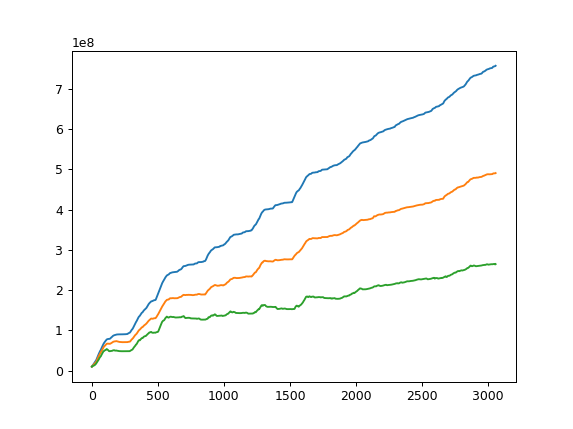

In [49]:
# plotting against persistence and perfect prediction
from utils.custom_loss import Balance
import matplotlib.pyplot as plt
perfect_bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
perfect_bal.update(test[1][18:], test[1][18:], test[0][18:,-1,1])

pred_bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
pred_bal.update(run.predictions[18:], test[1][18:], test[0][18:,-1,1])

persist_bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
temp_persist = persistence[18:] + test[0][:-18,-1,1] - test[0][18:,-1,1] # change to difference with y0 instead of y-18
persist_bal.update(temp_persist, test[1][18:], test[0][18:,-1,1])

plt.plot(perfect_bal.balance_list)
plt.plot(pred_bal.balance_list)
plt.plot(persist_bal.balance_list)

0

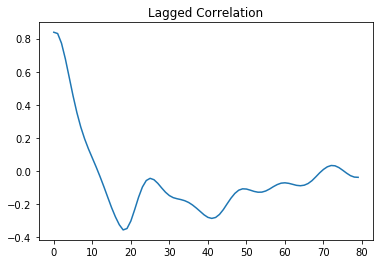

In [24]:
# # Visualise Lagged Correlation

from utils.visuals import lagged_correlation# calculate lag
corr = lagged_correlation(stats[0]['predictions'], test[1], plot=True)
np.amax(corr) 
np.argmax(corr)   

<IPython.core.display.Javascript object>


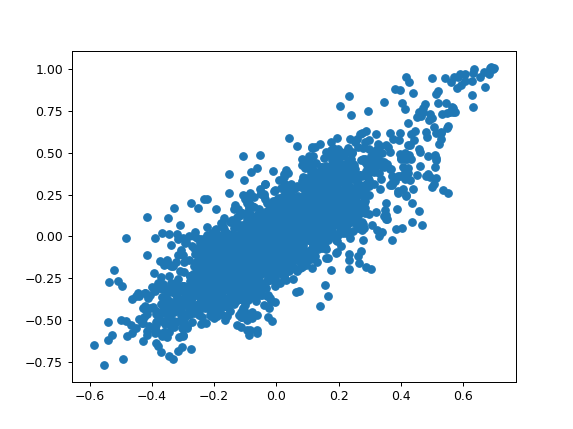

In [21]:
# plt.scatter(stats[0]['predictions'], test[1])

<IPython.core.display.Javascript object>


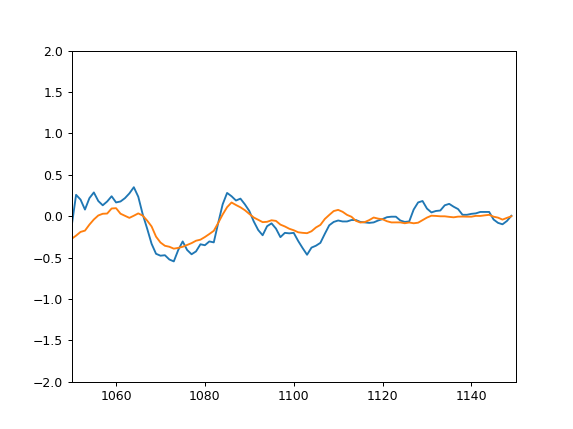

In [8]:
# # # Can't find a way to make this a function (plot not showing), so putting this in every notebook 
from matplotlib.animation import FuncAnimation, PillowWriter 
%matplotlib notebook

interval = 50
windowsize = 100
test_ = test[1]
pred = stats[0]['predictions']

fig  = plt.figure()
ax   = plt.axes(xlim=(0, windowsize), ylim=(-2, 2))
ln1, = plt.plot([],[])
ln2, = plt.plot([],[])

def update_animation(f):
    r = np.arange(f, f + windowsize)
    lim = ax.set_xlim(f, f+ windowsize)
    ln1.set_data(r, test_[r])
    ln2.set_data(r, pred[r])

frames = np.arange(0, len(pred)-windowsize, interval)
ani = FuncAnimation(fig, update_animation, frames=frames) 
plt.show()
#ani.save('results/gif/'+PKL_NAME+'.gif', writer='imagemagick', fps=50)